# Model comparison


In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score

In [3]:
MODEL_RESULT_FILES = [
    "data/model_acc/gpt35-turbo-nota.xlsx",
    "data/model_acc/gpt35-turbo-cola.xlsx",
    "data/model_acc/gpt4-nota.xlsx",
    "data/model_acc/gpt4-turbo-nota.xlsx",
]


In [4]:
dfs = []
for file in MODEL_RESULT_FILES:
    dfs.append(pd.read_excel(file))


In [5]:
TARGET_COL = "class_tweets_sample_augusto_29_02_24"

def create_accuracy_df(param_df):
    data = []
    for curr_df in param_df:
        data.append(
            [
                accuracy_score(curr_df[TARGET_COL], curr_df.iloc[:, col_index])
                for col_index in range(1, 5 + 1)
            ]
        )
    
    return pd.DataFrame(data, columns=[f"P{i}" for i in range(1, 5 + 1)])

In [6]:
acc_df = create_accuracy_df(dfs)
acc_df

,P1,P2,P3,P4,P5
0,0.616279,0.627907,0.627907,0.593023,0.581395
1,0.623529,0.647059,0.635294,0.694118,0.635294
2,0.635294,0.647059,0.729412,0.670588,0.705882
3,0.674419,0.593023,0.848837,0.767442,0.732558


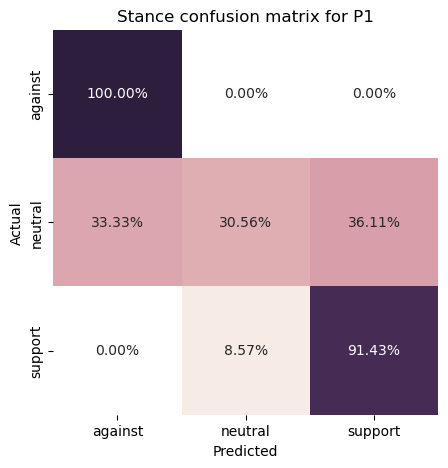

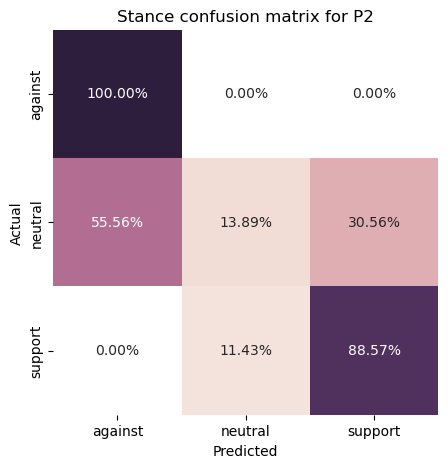

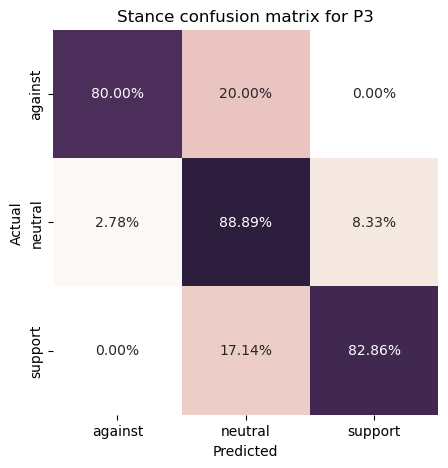

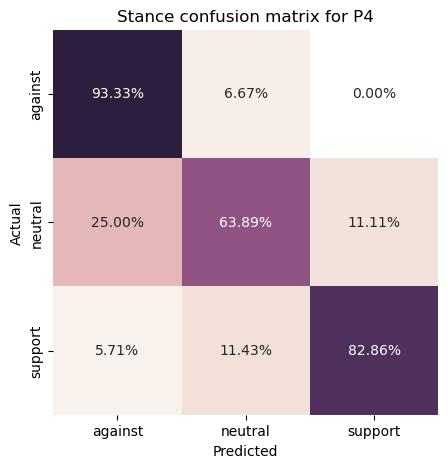

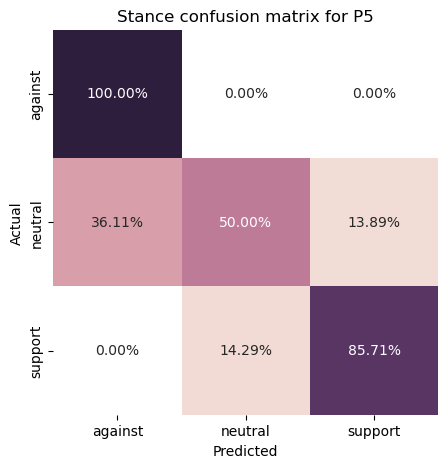

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Q_NAMES = [f"ag_p1903_v{i}--TA_chatgpt_J_chatgpt4-turbo_IGTA_True.db-1" for i in range(1, 7)]
Q_NAMES.remove("ag_p1903_v4--TA_chatgpt_J_chatgpt4-turbo_IGTA_True.db-1")

TARGET_COL = "class_tweets_sample_augusto_29_02_24"

# https://stackoverflow.com/questions/20927368/how-to-normalize-a-confusion-matrix
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

# gpt4-turbo-nota
df_merged = dfs[-1]

for i, qname in enumerate(Q_NAMES, start=1):
  y_true = df_merged[TARGET_COL]
  y_pred = df_merged[qname]
  data = confusion_matrix(y_true, y_pred)
  # data = data / data.astype(float).sum(axis=1)
  data = data.astype('float') / data.sum(axis=1)[:, np.newaxis]
  df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
  df_cm.index.name = 'Actual'
  df_cm.columns.name = 'Predicted'

  # display(df_cm)

  f, ax = plt.subplots(figsize=(5, 5))
  cmap = sns.cubehelix_palette(light=1, as_cmap=True)
  sns.heatmap(df_cm, cbar=False, annot=True, cmap=cmap, square=True, fmt='.2%',
              annot_kws={'size': 10})
  # plt.title(qname)
  plt.title(f"Stance confusion matrix for P{i}")
  plt.show()